# **CSEDUT-ML Course**
## Laboratory Session 3: 05/02/2022
### Time: 16:30 - 18:00 (1 hr 30 mins)
### Difficulty Level: Advanced
<hr>
<hr>

Things covered in this tutorial

* Linear Regression
    * Simple Linear Regression
    * Linear Regression from Scratch
    * Linear Regression Visualisation
* Polynomial Regression (Basis Function Regression)
* Gaussian Basis Function
* Regularization
    * L2 Regularization
    * L1 Regularization
* Example: Predicting Bicycle Traffic


# Linear Regresssion

Linear regression models are a good starting point for [regression](https://en.wikipedia.org/wiki/Regression_analysis) tasks. Such models are popular because they can be fit very quickly, and are very interpretable. You are probably familiar with the simplest form of a linear regression model (i.e., fitting a straight line to data) but such models can be extended to model more complicated data behavior!

In this section, we will start with a quick intuitive walk-through of the mathematics behind this well-known problem.

We begin with the standard imports:

In [ ]:
# Library for matrix manipulation
# Documentation: https://numpy.org/doc/stable/
import numpy as np
%matplotlib inline
# Libraries for creating plots in python
# Documentation: https://matplotlib.org/stable/
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Method for performing Linear Regression
# Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression

## Simple Linear Regression

We will start with the most familiar linear regression, a straight-line fit to data.
A straight-line fit is a model of the form
$$
y = ax + b
$$
where $a$ is commonly known as the *slope*, and $b$ is commonly known as the *intercept*.

Consider the following data, which is scattered about a line with a slope of 2 and an intercept of -5:

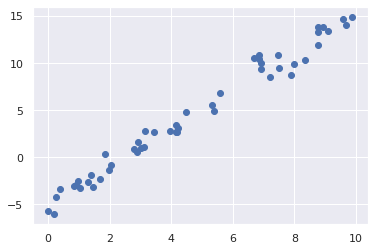

In [ ]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y)

We can use Scikit-Learn's ``LinearRegression`` estimator to fit this data and construct the best-fit line:

Text(0, 0.5, 'Y Values')

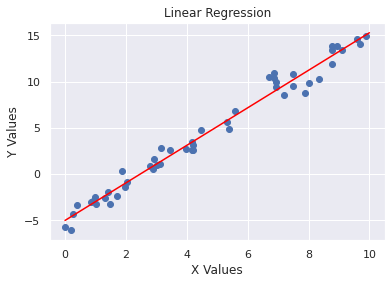

In [ ]:
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, color='red')
plt.title('Linear Regression')
plt.xlabel('X Values')
plt.ylabel('Y Values')

The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore.
Here the relevant parameters are ``coef_`` and ``intercept_``:

In [ ]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.0272088103606953
Model intercept: -4.998577085553204


The ``LinearRegression`` estimator is much more capable than this, however—in addition to simple straight-line fits, it can also handle multidimensional linear models of the form
$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$
where there are multiple $x$ values.
Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyper-plane to points in higher dimensions.

The multidimensional nature of such regressions makes them more difficult to visualize, but we can see one of these fits in action by building some example data, using NumPy's matrix multiplication operator:

In [ ]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(f'Model intercept: {model.intercept_}')
print(f'Model Coefficients: {model.coef_}')
# TODO: Add a 3D visualization

Model intercept: 0.5000000000000051
Model Coefficients: [ 1.5 -2.   1. ]


Here the $y$ data is constructed from three random $x$ values, and the linear regression recovers the coefficients used to construct the data.

In this way, we can use the single ``LinearRegression`` estimator to fit lines, planes, or hyperplanes to our data.
It still appears that this approach would be limited to strictly linear relationships between variables, but it turns out we can relax this as well.

# Linear Regression from Scratch

In this section, we code Linear Regression from scratch and control various parameters.

In [13]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
%matplotlib inline
weather_data = pd.read_csv("austin_weather.csv")
weather_data = weather_data.replace('T', 0)
  
# the data also contains '-' which indicates no 
# or NIL. This means that data is not available
# we need to replace these values as well.
weather_data = weather_data.replace('-', 0)

# Display the 10 first rows
weather_data.head(10)
#Extract columns
x=weather_data["TempAvgF"].to_numpy()

y=weather_data["HumidityAvgPercent"].to_numpy()
y = y.astype(np.int)


#Plot the dataset
plt.scatter(x,y)
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title("Student's data")
plt.show()

== Data Stats ==
Number of samples: 55;
Number of features: 6.



InvalidIndexError: (slice(None, None, None), 0)

In [2]:
# Hyperparamters for linear regression
learning_rate = 0.0001
initial_b = 0
initial_m = 0
num_iterations = 10

# Function for calculating the cost
def compute_cost(b, m, points):
    total_cost = 0
    N = float(len(points))
    
    #Compute sum of squared errors
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        total_cost += (y - (m * x + b)) ** 2
        
    #Return average of squared error
    return total_cost/N

# Functions for Gradient Descent
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    cost_graph = []

    #For every iteration, optimize b, m and compute its cost
    for i in range(num_iterations):
        cost_graph.append(compute_cost(b, m, points))
        b, m = step_gradient(b, m, np.array(points), learning_rate)

    return [b, m, cost_graph]

def step_gradient(b_current, m_current, points, learning_rate):
    m_gradient = 0
    b_gradient = 0
    N = float(len(points))

    #Calculate Gradient
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        m_gradient += - (2/N) * x * (y - (m_current * x + b_current))
        b_gradient += - (2/N) * (y - (m_current * x + b_current))
    
    #Update current m and b
    m_updated = m_current - learning_rate * m_gradient
    b_updated = b_current - learning_rate * b_gradient

    #Return updated parameters
    return b_updated, m_updated

Run `gradient_descent_runner()` to get optimized parameters b and m

In [4]:
b, m, cost_graph = gradient_descent_runner(data_np, initial_b, initial_m, learning_rate, num_iterations)

#Print optimized parameters
print ('Optimized b:', b)
print ('Optimized m:', m)

#Print error with optimized parameters
print ('Minimized cost:', compute_cost(b, m, data_np))

NameError: name 'data_np' is not defined

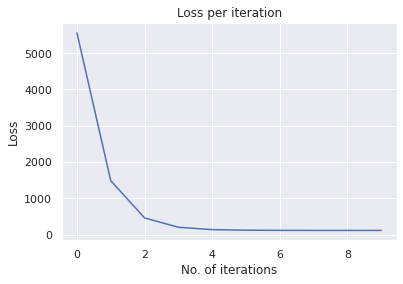

In [ ]:
plt.plot(cost_graph)
plt.xlabel('No. of iterations')
plt.ylabel('Loss')
plt.title('Loss per iteration')
plt.show()

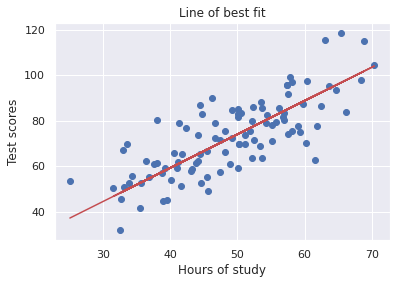

In [ ]:
#Plot dataset
plt.scatter(x, y)
#Predict y values
pred = m * x + b
#Plot predictions as line of best fit
plt.plot(x, pred, c='r')
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Line of best fit')
plt.show()

# Linear Regression Visualisations

## Gradient Descent for Simple Linear Regression

![linear regression GD visualisation](https://miro.medium.com/max/700/1*tXBtjkYLd01c25EbnXCvow.gif)

## Gradient Descent for Simple Linear Regression in 3D

![linear regression in 3D](https://miro.medium.com/max/700/1*OG1d4edy5BFYeQ0yHjBOJA.gif)

Source: https://towardsdatascience.com/gradient-descent-animation-1-simple-linear-regression-e49315b24672

# Visualizing the Regression Plane


## Regression Plane along with various parameters
![Various Parameters](https://miro.medium.com/max/700/1*AFGGAF1vlM9j1-hqRn8o5g.gif)


## Regression Plane along with the contour plot
![Contour Plot](https://miro.medium.com/max/700/1*j171iCmPHKmiYz_tbHBPXg.gif)


## Regression Plane along with the surface plot
![Surface Plot](https://miro.medium.com/max/700/1*xFr8is01v7M9LHNgThTq8g.gif)

Source: https://towardsdatascience.com/animations-of-multiple-linear-regression-with-python-73010a4d7b11

# Polynomial Regression (Basis Function Regression)

One trick you can use to adapt linear regression to nonlinear relationships between variables is to transform the data according to *basis functions*.

The idea is to take our multidimensional linear model:
$$
y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots
$$
and build the $x_1, x_2, x_3,$ and so on, from our single-dimensional input $x$.
That is, we let $x_n = f_n(x)$, where $f_n()$ is some function that transforms our data.

For example, if $f_n(x) = x^n$, our model becomes a polynomial regression:
$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$
Notice that this is *still a linear model*—the linearity refers to the fact that the coefficients $a_n$ never multiply or divide each other.
What we have effectively done is taken our one-dimensional $x$ values and projected them into a higher dimension, so that a linear fit can fit more complicated relationships between $x$ and $y$. An interesting explaination: https://stats.stackexchange.com/a/92087.

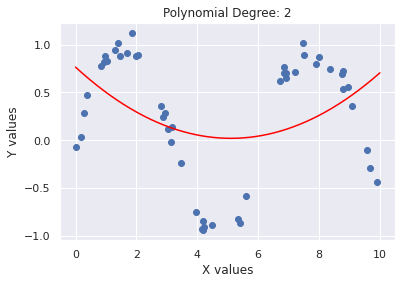

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


def polynomial_regression(degree, num_data_points=50):
    poly_model = make_pipeline(
        PolynomialFeatures(degree),
        LinearRegression(),
    )
    # Creating data (using sine wave) with random noise
    rng = np.random.RandomState(1)
    x = 10 * rng.rand(num_data_points)
    y = np.sin(x) + 0.1 * rng.randn(num_data_points)

    # Fitting the model and plotting the resulting non-linear boundary
    poly_model.fit(x[:, np.newaxis], y)
    yfit = poly_model.predict(xfit[:, np.newaxis])
    plt.scatter(x, y)
    plt.plot(xfit, yfit, color='red')
    plt.title(f'Polynomial Degree: {degree}')
    plt.xlabel(f'X values')
    plt.ylabel(f'Y values')
    return None

polynomial_regression(2)

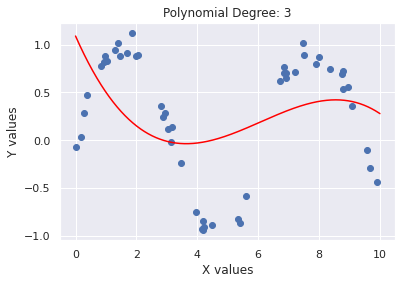

In [ ]:
polynomial_regression(3)

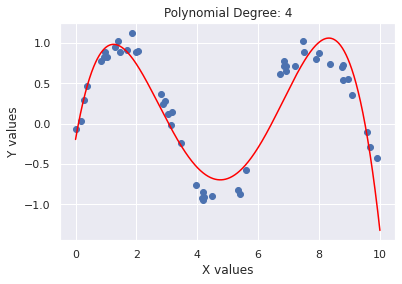

In [ ]:
polynomial_regression(4)

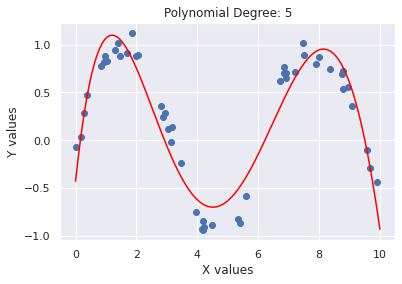

In [ ]:
polynomial_regression(5)

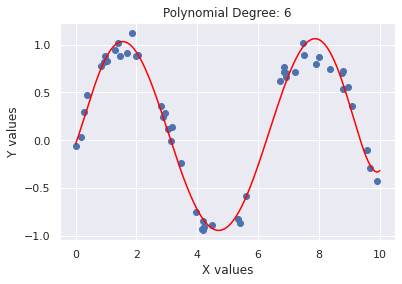

In [ ]:
polynomial_regression(6)

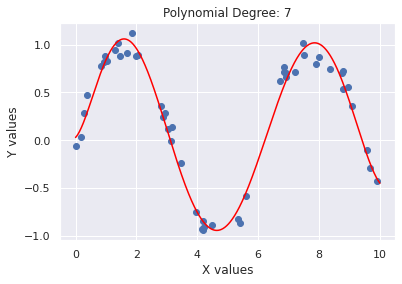

In [ ]:
polynomial_regression(7)

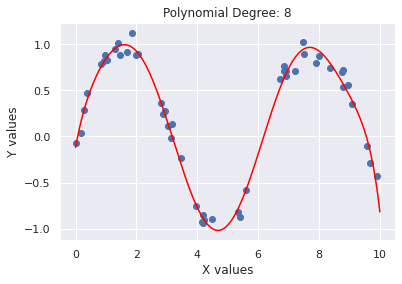

In [ ]:
polynomial_regression(8)

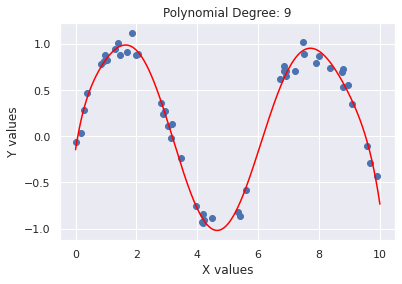

In [ ]:
polynomial_regression(9)

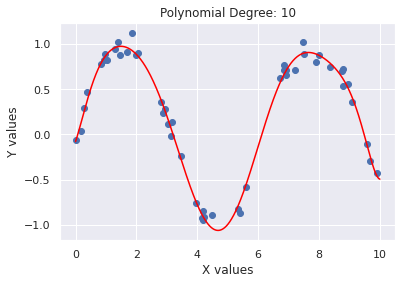

In [ ]:
polynomial_regression(10)

### Gaussian basis functions

Of course, other basis functions are possible.
For example, one useful pattern is to fit a model that is not a sum of polynomial bases, but a sum of Gaussian bases.
The result might look something like the following figure:

![Gaussian Basis function](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.06-gaussian-basis.png?raw=1)

The shaded regions in the plot are the scaled basis functions, and when added together they reproduce the smooth curve through the data.

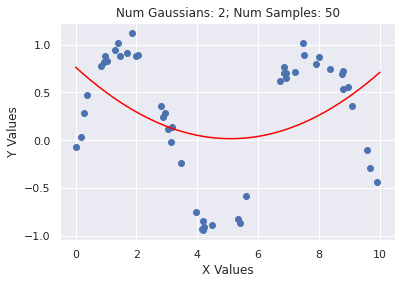

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)

def GaussianRegression(degree, num_data_points=50):
    gauss_model = make_pipeline(
        GaussianFeatures(degree),
        LinearRegression()
    )
    # Creating data (using sine wave) with random noise
    rng = np.random.RandomState(1)
    x = 10 * rng.rand(num_data_points)
    y = np.sin(x) + 0.1 * rng.randn(num_data_points)
    gauss_model.fit(x[:, np.newaxis], y)
    yfit = gauss_model.predict(xfit[:, np.newaxis])

    plt.scatter(x, y)
    plt.plot(xfit, yfit, color='red')
    plt.title(f'Num Gaussians: {degree}; Num Samples: {num_data_points}')
    plt.xlabel('X Values')
    plt.ylabel('Y Values')
    return None

GaussianRegression(2)

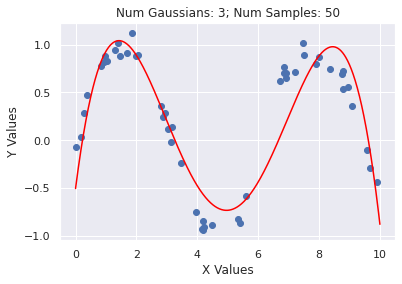

In [ ]:
GaussianRegression(3)

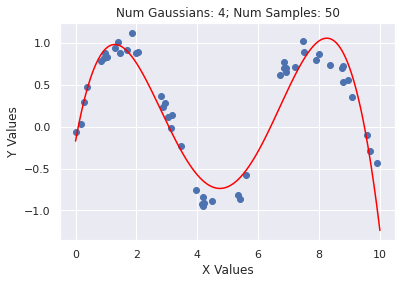

In [ ]:
GaussianRegression(4)

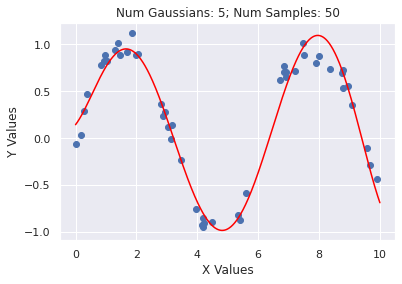

In [ ]:
GaussianRegression(5)

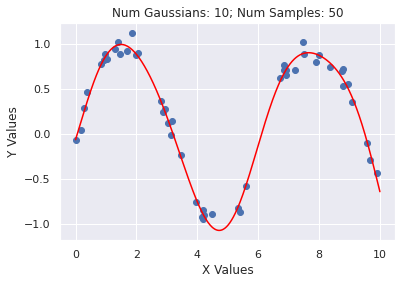

In [ ]:
GaussianRegression(10)

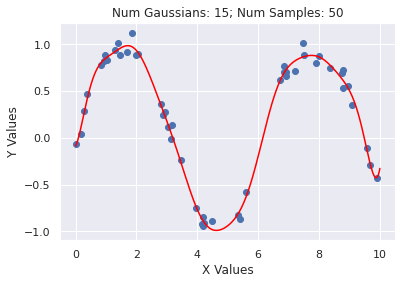

In [ ]:
GaussianRegression(15)

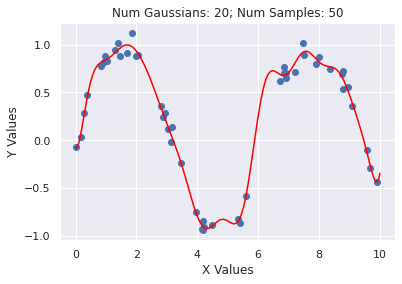

In [ ]:
GaussianRegression(20)

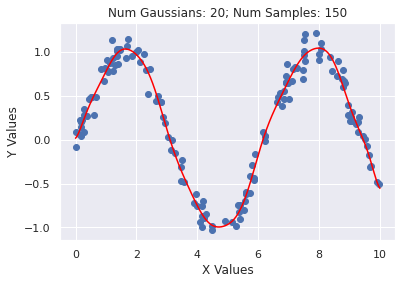

In [ ]:
GaussianRegression(20, 150)

### Overfitting
The introduction of basis functions into our linear regression makes the model much more flexible, but it also can very quickly lead to *over-fitting*.
For example, if we choose too many Gaussian basis functions, we end up with results that don't look so good:

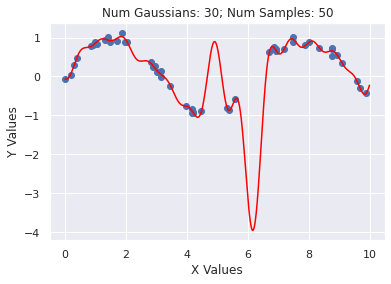

In [ ]:
GaussianRegression(30)

With the data projected to the 30-dimensional basis, the model has far too much flexibility and goes to extreme values between locations where it is constrained by data.
We can see the reason for this if we plot the coefficients of the Gaussian bases with respect to their locations:

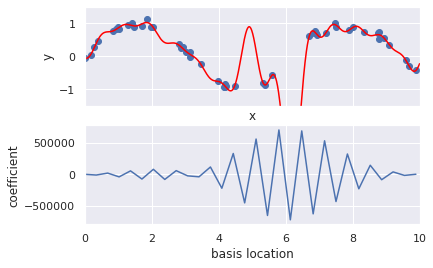

In [ ]:
def basis_plot(model, title=None):
    rng = np.random.RandomState(1)
    x = 10 * rng.rand(50)
    y = np.sin(x) + 0.1 * rng.randn(50)
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]), color='red')
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(0, 10))
    
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

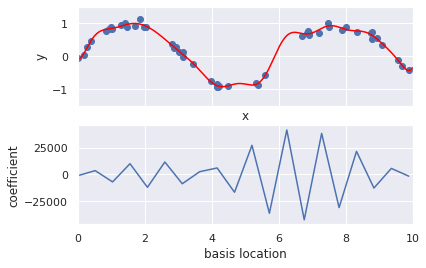

In [ ]:
model = make_pipeline(GaussianFeatures(20), LinearRegression())
basis_plot(model)

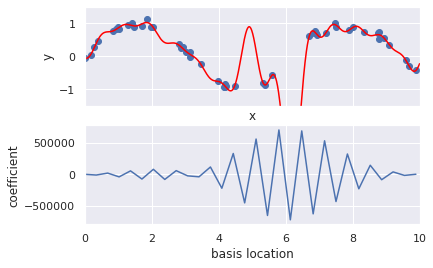

In [ ]:
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

The lower panel of this figure shows the amplitude of the basis function at each location.
This is typical over-fitting behavior when basis functions overlap: the coefficients of adjacent basis functions blow up and cancel each other out.
We know that such behavior is problematic, and it would be nice if we could limit such spikes expliticly in the model by penalizing large values of the model parameters.
Such a penalty is known as *regularization*, and comes in several forms.

### Ridge regression ($L_2$ Regularization)

Perhaps the most common form of regularization is known as *ridge regression* or $L_2$ *regularization*, sometimes also called *Tikhonov regularization*.
This proceeds by penalizing the sum of squares (2-norms) of the model coefficients; in this case, the penalty on the model fit would be 
$$
P = \alpha\sum_{n=1}^N \theta_n^2
$$
where $\alpha$ is a free parameter that controls the strength of the penalty.
This type of penalized model is built into Scikit-Learn with the ``Ridge`` estimator:

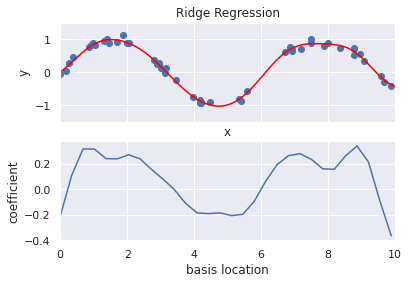

In [ ]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

The $\alpha$ parameter is essentially a knob controlling the complexity of the resulting model.
In the limit $\alpha \to 0$, we recover the standard linear regression result; in the limit $\alpha \to \infty$, all model responses will be suppressed.
One advantage of ridge regression in particular is that it can be computed very efficiently—at hardly more computational cost than the original linear regression model.

### Lasso regression ($L_1$ regularization)

Another very common type of regularization is known as lasso, and involves penalizing the sum of absolute values (1-norms) of regression coefficients:
$$
P = \alpha\sum_{n=1}^N |\theta_n|
$$
Though this is conceptually very similar to ridge regression, the results can differ surprisingly: for example, due to geometric reasons lasso regression tends to favor *sparse models* where possible: that is, it preferentially sets model coefficients to exactly zero.

We can see this behavior in duplicating the ridge regression figure, but using L1-normalized coefficients:

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.136e-03, tolerance: 2.065e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


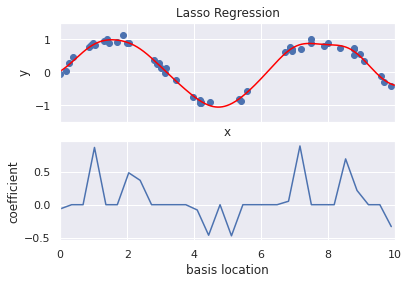

In [ ]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
basis_plot(model, title='Lasso Regression')

## Example: Predicting Bicycle Traffic

As an example, let's take a look at whether we can predict the number of bicycle trips across Seattle's Fremont Bridge based on weather, season, and other factors.

In this section, we will join the bike data with another dataset, and try to determine the extent to which weather and seasonal factors—temperature, precipitation, and daylight hours—affect the volume of bicycle traffic through this corridor.
Fortunately, the NOAA makes available their daily [weather station data](http://www.ncdc.noaa.gov/cdo-web/search?datasetid=GHCND) (station ID used: USW00024233) and we can easily use Pandas to join the two data sources.
We will perform a simple linear regression to relate weather and other information to bicycle counts, in order to estimate how a change in any one of these parameters affects the number of riders on a given day.

In particular, this is an example of how the tools of Scikit-Learn can be used in a statistical modeling framework, in which the parameters of the model are assumed to have interpretable meaning.

Let's start by loading the two datasets, indexing by date:

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4607k    0 4607k    0     0  1316k      0 --:--:--  0:00:03 --:--:-- 1316k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  229k  100  229k    0     0   318k      0 --:--:-- --:--:-- --:--:--  318k


(8.0, 17.0)

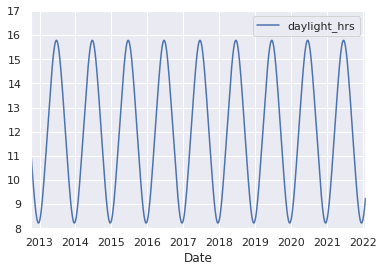

In [ ]:
!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD
!curl -o BicycleWeather.csv https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/BicycleWeather.csv
import pandas as pd
counts = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
weather = pd.read_csv('BicycleWeather.csv', index_col='DATE', parse_dates=True)

# Next we will compute the total daily bicycle traffic, and put this in its own dataframe:

daily = counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']] # remove other columns

# We saw previously that the patterns of use generally vary from day to day; 
# let's account for this in our data by adding binary columns that indicate the day of the week:

days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

# Similarly, we might expect riders to behave differently on holidays; 
# let's add an indicator of this as well:

from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

# We also might suspect that the hours of daylight would affect how many people 
# ride; let's use the standard astronomical calculation to add this information:

def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight for the given date"""
    days = (date - pd.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude))
         * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot()
plt.ylim(8, 17)

We can also add the average temperature and total precipitation to the data.
In addition to the inches of precipitation, let's add a flag that indicates whether a day is dry (has zero precipitation):

In [ ]:
# temperatures are in 1/10 deg C; convert to C
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])

# precip is in 1/10 mm; convert to inches
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)

daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']])

Finally, let's add a counter that increases from day 1, and measures how many years have passed.
This will let us measure any observed annual increase or decrease in daily crossings:

In [ ]:
daily['annual'] = (daily.index - daily.index[0]).days / 365.

Now our data is in order, and we can take a look at it:

In [ ]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual
Date,,,,,,,,,,,,,,
2012-10-03,14084.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,13.35,1.0,0.000000
2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,13.60,1.0,0.002740
2012-10-05,12592.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,15.30,1.0,0.005479
2012-10-06,8024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,15.85,1.0,0.008219
2012-10-07,8568.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,15.85,1.0,0.010959


With this in place, we can choose the columns to use, and fit a linear regression model to our data.
We will set ``fit_intercept = False``, because the daily flags essentially operate as their own day-specific intercepts:

In [ ]:
# Drop any rows with null values
daily.dropna(axis=0, how='any', inplace=True)

column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday',
                'daylight_hrs', 'PRCP', 'dry day', 'Temp (C)', 'annual']
X = daily[column_names]
y = daily['Total']

model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['predicted'] = model.predict(X)

Finally, we can compare the total and predicted bicycle traffic visually:

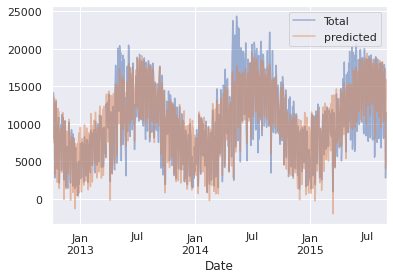

In [ ]:
daily[['Total', 'predicted']].plot(alpha=0.5)

It is evident that we have missed some key features, especially during the summer time.
Either our features are not complete (i.e., people decide whether to ride to work based on more than just these) or there are some nonlinear relationships that we have failed to take into account (e.g., perhaps people ride less at both high and low temperatures).
Nevertheless, our rough approximation is enough to give us some insights, and we can take a look at the coefficients of the linear model to estimate how much each feature contributes to the daily bicycle count:

In [ ]:
params = pd.Series(model.coef_, index=X.columns)
params

Mon             2019.531023
Tue             2440.935744
Wed             2370.694566
Thu             1929.432461
Fri              711.921382
Sat            -4413.206842
Sun            -4534.268983
holiday        -4749.605523
daylight_hrs     515.406045
PRCP           -2659.339527
dry day         2190.794369
Temp (C)         260.651164
annual           107.770852
dtype: float64

These numbers are difficult to interpret without some measure of their uncertainty.
We can compute these uncertainties quickly using bootstrap resamplings of the data:

In [ ]:
from sklearn.utils import resample
np.random.seed(42)
err = np.std([model.fit(*resample(X, y)).coef_
              for i in range(1000)], 0)

With these errors estimated, let's again look at the results:

In [ ]:
print(pd.DataFrame({'effect': params.round(0),
                    'error': err.round(0)}))

              effect  error
Mon           2020.0  347.0
Tue           2441.0  340.0
Wed           2371.0  334.0
Thu           1929.0  344.0
Fri            712.0  322.0
Sat          -4413.0  324.0
Sun          -4534.0  336.0
holiday      -4750.0  664.0
daylight_hrs   515.0   36.0
PRCP         -2659.0  250.0
dry day       2191.0  140.0
Temp (C)       261.0   14.0
annual         108.0   68.0


We first see that there is a relatively stable trend in the weekly baseline: there are many more riders on weekdays than on weekends and holidays.
We see that for each additional hour of daylight, 129 ± 9 more people choose to ride; a temperature increase of one degree Celsius encourages 65 ± 4 people to grab their bicycle; a dry day means an average of 548 ± 33 more riders, and each inch of precipitation means 665 ± 62 more people leave their bike at home.
Once all these effects are accounted for, we see a modest increase of 27 ± 18 new daily riders each year.

Our model is almost certainly missing some relevant information. For example, nonlinear effects (such as effects of precipitation *and* cold temperature) and nonlinear trends within each variable (such as disinclination to ride at very cold and very hot temperatures) cannot be accounted for in this model.
Additionally, we have thrown away some of the finer-grained information (such as the difference between a rainy morning and a rainy afternoon), and we have ignored correlations between days (such as the possible effect of a rainy Tuesday on Wednesday's numbers, or the effect of an unexpected sunny day after a streak of rainy days).
These are all potentially interesting effects, and you now have the tools to begin exploring them if you wish!

# References
- https://towardsdatascience.com/animations-of-multiple-linear-regression-with-python-73010a4d7b11
- https://towardsdatascience.com/gradient-descent-animation-1-simple-linear-regression-e49315b24672
- https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/data/BicycleWeather.csv
- https://github.com/philippbauch/simple-linear-regression-notebook/blob/master/linear-regression-demo.ipynb
- https://towardsdatascience.com/animations-of-gradient-descent-and-loss-landscapes-of-neural-networks-in-python-e757f3584057
- https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.06-Linear-Regression.ipynb#scrollTo=fMopCubcRR9B